In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import glob

In [156]:
str_info = pd.read_csv("../kg1/str_info_all.csv").query("str_var > 2")
hipstr = np.array([int(i.split("|")[2]) for i in str_info["methods"]])
str_info = str_info.iloc[hipstr == 1,:]

In [157]:
str_info["period"].value_counts(normalize=True)

period
2    0.484939
1    0.443591
4    0.036124
3    0.023152
5    0.011146
6    0.001047
Name: proportion, dtype: float64

In [71]:
hs_data = pd.read_csv("../overlap/hg_sg/hs_var_1.csv", index_col = 0)
threshold = 1
str_info = pd.read_csv("../hgdp/hgdp_str_info.csv").query("str_var > @threshold")
str_info["str_uid"] = str_info["chr"] + "_" + str_info["str_id"].astype("str")
str_info = str_info.loc[str_info["str_uid"].isin(hs_data.index),]

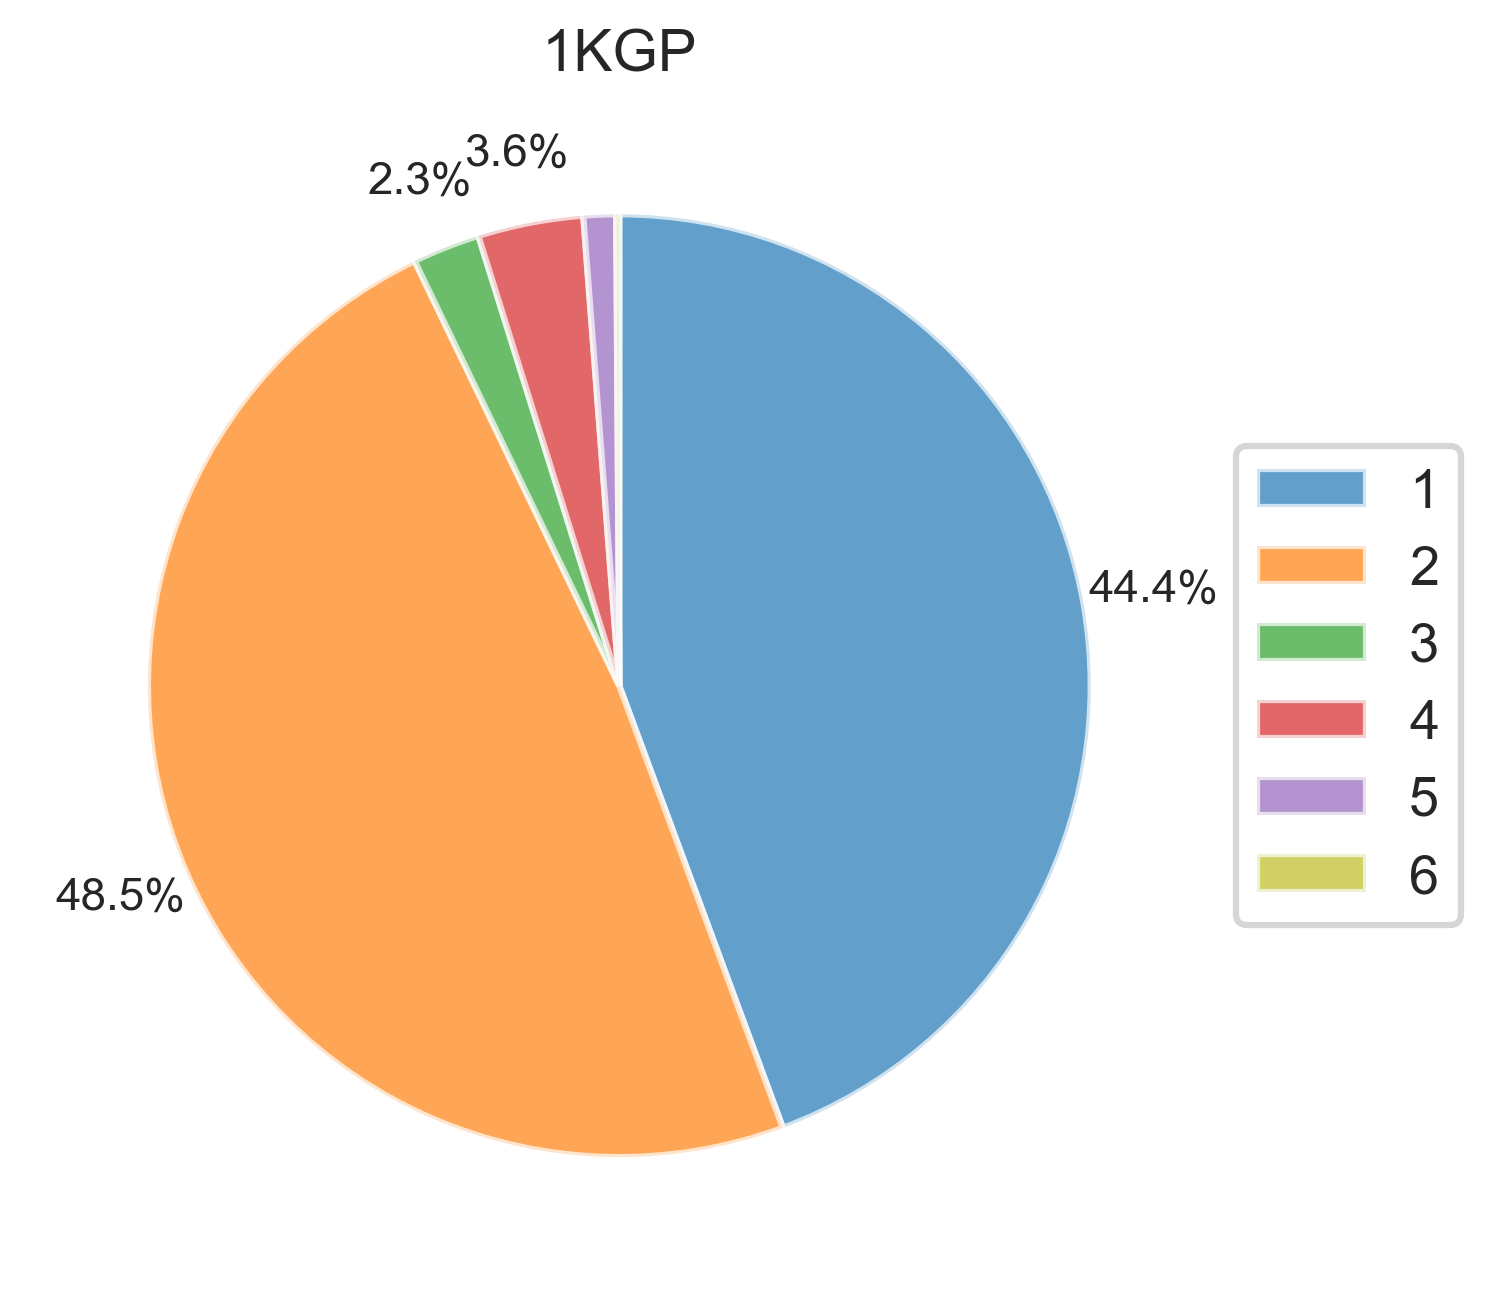

In [76]:
def autopct_threshold(pct):
    return f'{pct:.1f}%' if pct > 2 else ''  # show only if >2%

pcount = str_info.groupby(["period"])["period"].count()
custom_colors = [sns.color_palette("tab10")[i] for i in [0,1,2,3,4,8]]

fig,ax = plt.subplots(dpi = 300)
sns.set_theme(style="white", context="talk", font_scale=1.2)  
ax.pie(
    pcount,
    labels = pcount.index,
    autopct = autopct_threshold,            # show percentages
    startangle = 90,                # start at top
    counterclock = False,           # clockwise rotation
    textprops = {'fontsize': 11},   # adjust text size
    wedgeprops = {'edgecolor': 'white', 'alpha':0.7},  # clean wedge borders
    colors = custom_colors,  # nice color map
    pctdistance = 1.15, 
    labeldistance = None
)

ax.set_title("1KGP", fontsize=14)
ax.legend(
    pcount.index,
    #title="Category",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=13
)
plt.tight_layout()
plt.show()

In [24]:
hs_region_venn = pd.read_csv("./figure4/hs_region_venn.csv")

In [ ]:
def autopct_threshold(pct):
    return f'{pct:.1f}%' if pct > 2 else ''  # show only if >2%

select_colors = [sns.color_palette("Set2")[i] for i in [0,1,2,3,4,5,7]]
custom_palette = dict(zip(hs_region_venn["region"], select_colors))

fig,ax = plt.subplots(dpi = 300)
sns.set_theme(style="white", context="talk", font_scale=1.2)  
ax.pie(
    hs_region_venn["count"],
    labels = hs_region_venn["region"],
    autopct = autopct_threshold,            # show percentages
    startangle = 90,                # start at top
    counterclock = False,           # clockwise rotation
    textprops = {'fontsize': 11},   # adjust text size
    wedgeprops = {'edgecolor': 'white', 'alpha':0.7},  # clean wedge borders
    colors = select_colors,  # nice color map
    pctdistance = 1.15, 
    labeldistance = None
)

order = [4, 6, 5, 3, 1,0,2] #hs
#order = [3,5,6,4,1,0,2] #kg
handles, labels = ax.get_legend_handles_labels()
ax.set_title("HGDP+SGDP", fontsize=14)
ax.legend( 
    [handles[i] for i in order],
    [labels[i] for i in order],
    #hs_region_venn["region"],
    #title="Category",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=13
)
plt.tight_layout()
plt.show()

In [68]:
df_pos_region = pd.read_csv("./figure5/kg_pos_region.csv")
df_neg_region = pd.read_csv("./figure5/kg_neg_region.csv")

In [64]:
df_pos_region["is_significant"].value_counts()

is_significant
False    68
Name: count, dtype: int64

In [ ]:
comp_order = ["S" + str(i) for i in range(1,12)]

fig, g = plt.subplots(1, 2, figsize = (15,4), dpi = 300, 
                       sharey = True, sharex=True)
sns.set_context("talk", font_scale=0.8)
sns.set_style("white")
sns.barplot(ax = g[0],
            x = "component", y = "enrichment_ratio", 
            hue = "region",
            order = comp_order,
            #dodge=False,
            palette = custom_palette,
            data = df_pos_region)
g[0].legend_.remove()
g[0].set_xlabel("")
g[0].set_title("Contraction channel")
g[0].set_ylabel("Enrichment ratio")
g[0].axhline(1, ls="--", c="red", lw=1)

sns.barplot(ax = g[1],
            x = "component", y = "enrichment_ratio", 
            hue = "region",
            palette = custom_palette,
            order = comp_order,
            #dodge=False,
            data = df_neg_region)

order = [3, 5, 6, 4, 1,0,2] #hs
#order = [3,5,6,4,1,0,2] #kg
handles, labels = g[1].get_legend_handles_labels()
g[1].legend( 
    [handles[i] for i in order],
    [labels[i] for i in order],
    loc="upper left",
    bbox_to_anchor=(1, 1)
)
g[1].set_xlabel("")
g[1].set_title("Expansion channel")
g[1].axhline(1, ls="--", c="red", lw=1)

In [ ]:
def merge_period(period = 1):
    cv_list = glob.glob("./figure5/motif/*" + str(period) + "_csv")
    cvn = pd.read_csv(cv_list[0], index_col = 0)
    #cvn.index = cvn.index + str(0)
    for i in range(1, len(cv_list)):
        cvi = pd.read_csv(cv_list[i], index_col = 0)
        #cvi.index = cvi.index + str(i)
        cvn = pd.concat([cvn, cvi], axis = 0)
    cvn["type"] = cvn.index
    df_cv = cvn.melt(id_vars=["type"], var_name="K", value_name="value")
    df_cv = df_cv.query("K != '2'")
    return df_cv

In [4]:
df_1 = merge_period(period = 1)
df_2 = merge_period(period = 2)
df_3 = merge_period(period = 3)
df_4 = merge_period(period = 4)
df_5 = merge_period(period = 5)
df_6 = merge_period(period = 6)

In [ ]:
para = "avercorr"
fig, g = plt.subplots(2, 3, figsize = (20,9), dpi = 300, sharey=True)
sns.set_context("talk", font_scale = 1.1)
sns.set_style("whitegrid")
sns.boxplot(ax = g[0,0],
    data = df_1.query("type == @para "), x = "K", y = "value")
g[0,0].set_xlabel("")
#g[0,0].set_ylabel("Shared components")
g[0,0].set_ylabel("Average correlation")
g[0,0].set_title("motif length 1")

sns.boxplot(ax = g[0,1],
    data = df_2.query("type == @para "), x = "K", y = "value")
g[0,1].set_xlabel("")
g[0,1].set_title("motif length 2")

sns.boxplot(ax = g[0,2],
    data = df_3.query("type == @para "), x = "K", y = "value")
g[0,2].set_xlabel("")
g[0,2].set_title("motif length 3")

sns.boxplot(ax = g[1,0],
    data = df_4.query("type == @para "), x = "K", y = "value")
g[1,0].set_xlabel("")
#g[1,0].set_ylabel("Shared components")
g[1,0].set_ylabel("Average correlation")
g[1,0].set_title("motif length 4")

sns.boxplot(ax = g[1,1],
    data = df_5.query("type == @para "), x = "K", y = "value")
g[1,1].set_xlabel("")
g[1,1].set_title("motif length 5")

sns.boxplot(ax = g[1,2],
    data = df_6.query("type == @para "), x = "K", y = "value")
g[1,2].set_xlabel("")
g[1,2].set_title("motif length 6")

plt.tight_layout()

In [132]:
weight_pos = pd.read_csv("./figure5/hs_weights_pos.csv")
weight_neg = pd.read_csv("./figure5/hs_weights_neg.csv")

In [154]:
i = 10
top_per = round(weight_pos.shape[0]*0.05)
top_pos = np.argsort(weight_pos.loc[:,str(i)])[::-1][:top_per]
top_neg = np.argsort(weight_neg.loc[:,str(i)])[::-1][:top_per]
df_plot = pd.DataFrame({"pos": weight_pos[str(i)], "neg": weight_neg[str(i)]})
df_plot["set"] = "notsig"
df_plot.iloc[top_pos, -1] = "sig"
df_plot.iloc[top_neg, -1] = "sig"

In [ ]:
set_order = ["notsig", "sig"]
df_plot["set"] = pd.Categorical(df_plot["set"], categories = set_order, ordered=True)
g = sns.jointplot(data = df_plot, 
                  x = "pos", y = "neg", 
                  kind = "hist", 
                  hue = "set",
                  hue_order = set_order,
                  height = 5,
                  ratio = 5,
                  palette = {"notsig": sns.color_palette()[0], "sig": sns.color_palette()[1]}
                  )
g.ax_joint.legend_.remove() 
g.set_axis_labels("$H_{pos,11}$", "$H_{neg}$")
g.fig.set_dpi(300)